In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import mlflow
import mlflow.keras

import streamlit as st

plt.style.use('seaborn')

# Développement du modèle

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


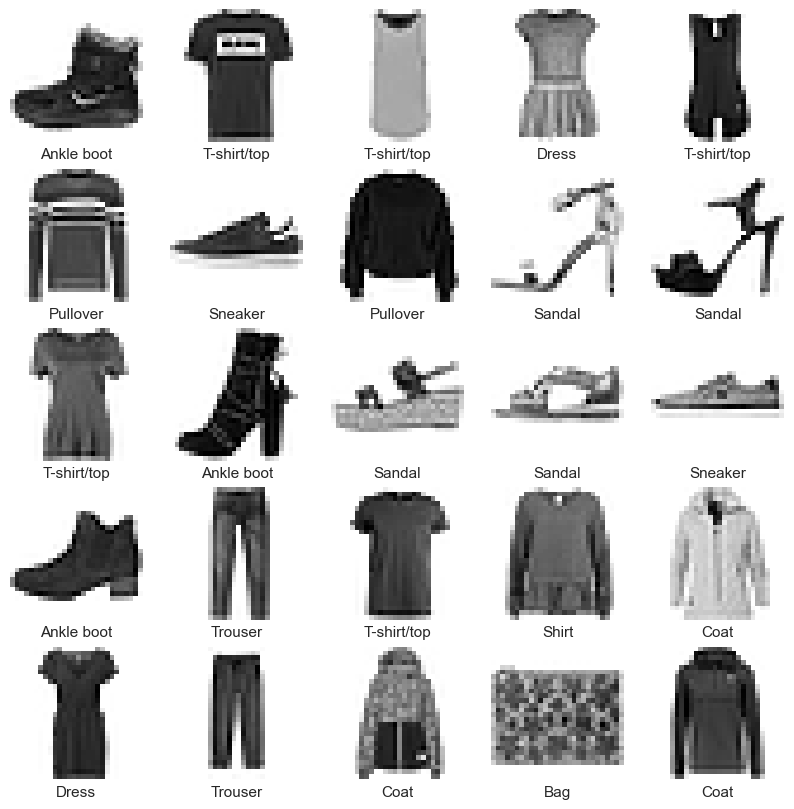

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Processing des données avant de les donner aux différents réseaux de neurones (CNN et Dense)

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train_dense = X_train.reshape(X_train.shape[0], 28*28)
X_test_dense = X_test.reshape(X_test.shape[0], 28*28)

X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [6]:
mlflow.tensorflow.autolog()

2025/03/24 09:39:30 WARNING mlflow.utils.autologging_utils: MLflow tensorflow autologging is known to be compatible with 2.7.4 <= tensorflow <= 2.18.0, but the installed version is 2.19.0. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a compatible version, or try upgrading MLflow.


Réseau de neurones dense

In [7]:
with mlflow.start_run(run_name="Dense_NN"):
    dense_model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    
    dense_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    dense_history = dense_model.fit(X_train_dense, y_train_cat,
                            batch_size=128,
                            epochs=20,
                            verbose=1,
                            validation_split=0.1,
                            callbacks=[early_stopping])
    
    dense_score = dense_model.evaluate(X_test_dense, y_test_cat, verbose=0)
    print(f'Dense Model - Test loss: {dense_score[0]}, Test précision: {dense_score[1]}')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 0.9529

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6662 - loss: 0.9361 - val_accuracy: 0.8408 - val_loss: 0.4378
Epoch 2/20
409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.4648

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.4645 - val_accuracy: 0.8590 - val_loss: 0.3829
Epoch 3/20
412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.4100

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.4099 - val_accuracy: 0.8627 - val_loss: 0.3713
Epoch 4/20
400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3828

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.3828 - val_accuracy: 0.8633 - val_loss: 0.3687
Epoch 5/20
399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3726

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.3722 - val_accuracy: 0.8758 - val_loss: 0.3413
Epoch 6/20
400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3497

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3497 - val_accuracy: 0.8802 - val_loss: 0.3377
Epoch 7/20
404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3308

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3311 - val_accuracy: 0.8803 - val_loss: 0.3284
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3279 - val_accuracy: 0.8765 - val_loss: 0.3284
Epoch 9/20
405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.3234

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3231 - val_accuracy: 0.8765 - val_loss: 0.3275
Epoch 10/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8910 - loss: 0.2990 - val_accuracy: 0.8788 - val_loss: 0.3300
Epoch 11/20
410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.3023

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3024 - val_accuracy: 0.8843 - val_loss: 0.3165
Epoch 12/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.2954 - val_accuracy: 0.8783 - val_loss: 0.3230
Epoch 13/20
402/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8952 - loss: 0.2877

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.2879 - val_accuracy: 0.8852 - val_loss: 0.3160
Epoch 14/20
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8949 - loss: 0.2834

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.2835 - val_accuracy: 0.8850 - val_loss: 0.3131
Epoch 15/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2766

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8971 - loss: 0.2766 - val_accuracy: 0.8872 - val_loss: 0.3115
Epoch 16/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.2721 - val_accuracy: 0.8847 - val_loss: 0.3143
Epoch 17/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.2698 - val_accuracy: 0.8870 - val_loss: 0.3119
Epoch 18/20
408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9012 - loss: 0.2628

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9012 - loss: 0.2629 - val_accuracy: 0.8900 - val_loss: 0.3052
Epoch 19/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9011 - loss: 0.2645 - val_accuracy: 0.8810 - val_loss: 0.3247
Epoch 20/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 0.2616 - val_accuracy: 0.8883 - val_loss: 0.3176
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dense Model - Test loss: 0.33033809065818787, Test précision: 0.8867999911308289


CNN

In [8]:
with mlflow.start_run(run_name="CNN"):
    cnn_model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    cnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    cnn_history = cnn_model.fit(X_train_cnn, y_train_cat,
                        batch_size=128,
                        epochs=20,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[early_stopping])
    
    cnn_score = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
    print(f'CNN Model - Test loss: {cnn_score[0]}, Test précision: {cnn_score[1]}')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6507 - loss: 0.9659

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6517 - loss: 0.9631 - val_accuracy: 0.8487 - val_loss: 0.4185
Epoch 2/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8320 - loss: 0.4640

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8320 - loss: 0.4639 - val_accuracy: 0.8688 - val_loss: 0.3521
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8560 - loss: 0.3999

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8560 - loss: 0.3999 - val_accuracy: 0.8782 - val_loss: 0.3173
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8704 - loss: 0.3588

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8704 - loss: 0.3588 - val_accuracy: 0.8832 - val_loss: 0.3155
Epoch 5/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8793 - loss: 0.3337

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8793 - loss: 0.3337 - val_accuracy: 0.8903 - val_loss: 0.2904
Epoch 6/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8847 - loss: 0.3170

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8847 - loss: 0.3170 - val_accuracy: 0.8957 - val_loss: 0.2722
Epoch 7/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8903 - loss: 0.3044

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8903 - loss: 0.3044 - val_accuracy: 0.8982 - val_loss: 0.2624
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8939 - loss: 0.2915

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8939 - loss: 0.2915 - val_accuracy: 0.9020 - val_loss: 0.2550
Epoch 9/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9031 - loss: 0.2690

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9031 - loss: 0.2691 - val_accuracy: 0.9058 - val_loss: 0.2477
Epoch 10/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9070 - loss: 0.2610

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9070 - loss: 0.2611 - val_accuracy: 0.9073 - val_loss: 0.2421
Epoch 11/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9038 - loss: 0.2600

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9038 - loss: 0.2600 - val_accuracy: 0.9085 - val_loss: 0.2415
Epoch 12/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9081 - loss: 0.2516

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9081 - loss: 0.2516 - val_accuracy: 0.9117 - val_loss: 0.2381
Epoch 13/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9101 - loss: 0.2430

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9101 - loss: 0.2430 - val_accuracy: 0.9128 - val_loss: 0.2327
Epoch 14/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9128 - loss: 0.2329

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9128 - loss: 0.2329 - val_accuracy: 0.9133 - val_loss: 0.2283
Epoch 15/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9149 - loss: 0.2270

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9149 - loss: 0.2271 - val_accuracy: 0.9173 - val_loss: 0.2215
Epoch 16/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9189 - loss: 0.2207 - val_accuracy: 0.9148 - val_loss: 0.2287
Epoch 17/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9168 - loss: 0.2249 - val_accuracy: 0.9145 - val_loss: 0.2220
Epoch 18/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9224 - loss: 0.2105

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9224 - loss: 0.2105 - val_accuracy: 0.9172 - val_loss: 0.2174
Epoch 19/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9257 - loss: 0.2020 - val_accuracy: 0.9170 - val_loss: 0.2208
Epoch 20/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9233 - loss: 0.2068 - val_accuracy: 0.9213 - val_loss: 0.2174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
CNN Model - Test loss: 0.24015788733959198, Test précision: 0.9122999906539917


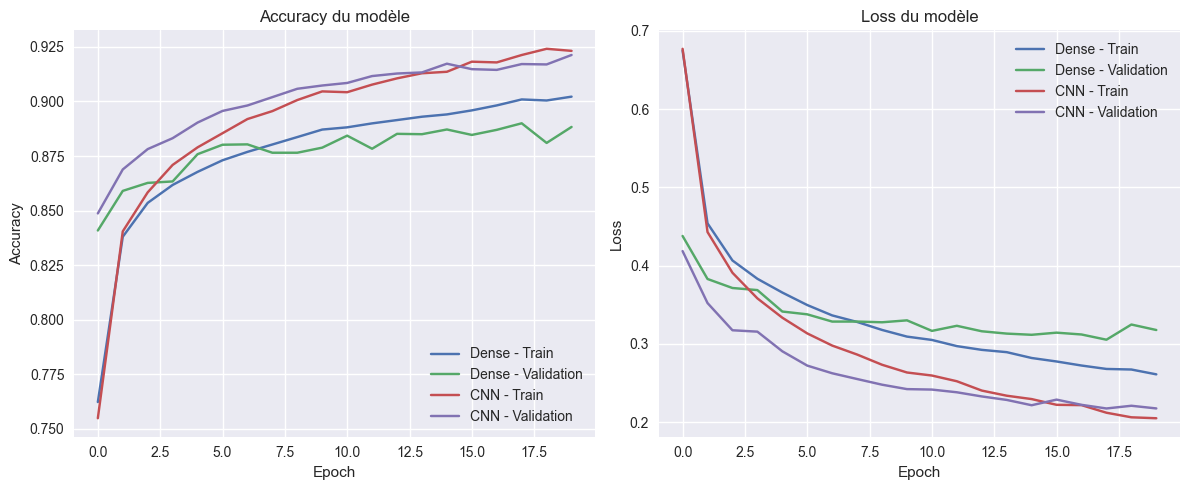

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(dense_history.history['accuracy'], label='Dense - Train')
plt.plot(dense_history.history['val_accuracy'], label='Dense - Validation')
plt.plot(cnn_history.history['accuracy'], label='CNN - Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN - Validation')
plt.title('Accuracy du modèle')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dense_history.history['loss'], label='Dense - Train')
plt.plot(dense_history.history['val_loss'], label='Dense - Validation')
plt.plot(cnn_history.history['loss'], label='CNN - Train')
plt.plot(cnn_history.history['val_loss'], label='CNN - Validation')
plt.title('Loss du modèle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
dense_model.save('fashion_mnist_dense.keras')
cnn_model.save('fashion_mnist_cnn.keras')

In [29]:
!mlflow ui

[2025-03-24 09:55:05 +0100] [36879] [INFO] Starting gunicorn 23.0.0
[2025-03-24 09:55:05 +0100] [36879] [INFO] Listening at: http://127.0.0.1:5000 (36879)
[2025-03-24 09:55:05 +0100] [36879] [INFO] Using worker: sync
[2025-03-24 09:55:05 +0100] [36880] [INFO] Booting worker with pid: 36880
[2025-03-24 09:55:05 +0100] [36881] [INFO] Booting worker with pid: 36881
[2025-03-24 09:55:05 +0100] [36882] [INFO] Booting worker with pid: 36882
[2025-03-24 09:55:05 +0100] [36883] [INFO] Booting worker with pid: 36883
^C
[2025-03-24 09:55:30 +0100] [36879] [INFO] Handling signal: int
[2025-03-24 09:55:30 +0100] [36880] [INFO] Worker exiting (pid: 36880)
[2025-03-24 09:55:30 +0100] [36882] [INFO] Worker exiting (pid: 36882)
[2025-03-24 09:55:30 +0100] [36881] [INFO] Worker exiting (pid: 36881)
[2025-03-24 09:55:30 +0100] [36883] [INFO] Worker exiting (pid: 36883)


In [30]:
import mlflow

dense_run = mlflow.get_run("9c77c740b43e422dae43630f98342150")
cnn_run = mlflow.get_run("5a2c0462c3a94f01b5d74d40a529ca53")

dense_metrics = dense_run.data.metrics
cnn_metrics = cnn_run.data.metrics

for metric in set(dense_metrics.keys()).intersection(cnn_metrics.keys()):
    print(f"{metric}: Dense={dense_metrics[metric]}, CNN={cnn_metrics[metric]}")

validation_loss: Dense=0.3176431357860565, CNN=0.2174176424741745
accuracy: Dense=0.902222216129303, CNN=0.9232222437858582
validation_accuracy: Dense=0.8883333206176758, CNN=0.9213333129882812
val_accuracy: Dense=0.8883333206176758, CNN=0.9213333129882812
val_loss: Dense=0.3176431357860565, CNN=0.2174176424741745
loss: Dense=0.260972261428833, CNN=0.20486532151699066


# App streamlit

In [26]:
!streamlit run dl_streamlit.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.11:8501

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
/Users/work/Documents/random_notebooks/dl_streamlit.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(clas